# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *

## **Read Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/tsla-text/tsla.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


## **Split Dataset into Train & Test**

In [6]:
# train --> 80 %
# test --> 20 %

train_size = int(len(df) * 0.8)  #1486
train_size

1486

In [7]:
train = df[0: train_size] # 0 : 1486 - 1 --> 0:1485
train.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [8]:
train.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1481,2016-05-17,209.05,209.82,204.02,204.66,2303002,0
1482,2016-05-18,209.15,215.31,207.75,211.17,4454848,0
1483,2016-05-19,213.62,216.79,207.30,215.21,6582419,0
1484,2016-05-20,216.99,220.55,216.35,220.28,8635216,0
1485,2016-05-23,219.87,222.60,215.86,216.22,4335487,0


In [9]:
data_length = len(df)
data_length

1858

In [10]:
test = df[train_size : data_length]  # 1486 ---> 1858
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [11]:
test.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [12]:
scaler = MinMaxScaler()

In [13]:
train = train.loc[: ,['Open']].values
train

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [14]:
test_array = test.loc[: ,['Open']].values
test_array

array([[216.6  ],
       [217.91 ],
       [220.5  ],
       [224.99 ],
       [223.04 ],
       [221.48 ],
       [219.59 ],
       [220.   ],
       [218.   ],
       [222.24 ],
       [233.8  ],
       [234.98 ],
       [227.39 ],
       [219.5  ],
       [218.88 ],
       [216.95 ],
       [217.42 ],
       [217.81 ],
       [219.5  ],
       [220.68 ],
       [199.47 ],
       [195.69 ],
       [190.05 ],
       [190.86 ],
       [201.89 ],
       [205.13 ],
       [212.97 ],
       [206.14 ],
       [209.73 ],
       [210.   ],
       [213.1  ],
       [217.8  ],
       [219.96 ],
       [224.1  ],
       [225.5  ],
       [223.12 ],
       [222.52 ],
       [219.64 ],
       [225.   ],
       [226.47 ],
       [226.   ],
       [221.99 ],
       [222.27 ],
       [227.69 ],
       [229.34 ],
       [227.95 ],
       [230.7  ],
       [235.5  ],
       [229.37 ],
       [227.37 ],
       [225.69 ],
       [230.   ],
       [228.   ],
       [226.82 ],
       [228.24 ],
       [22

In [15]:
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [16]:
#test_scaled = scaler.transform(test_array)
#test_scaled

In [17]:
length = len(train_scaled)
length

1486

In [18]:
time_step = 40
x_train = []
y_train = []

In [19]:
for i in range(time_step, length):
    x_train.append(train_scaled[i - time_step:i, 0])
    y_train.append(train_scaled[i, 0])

In [20]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [21]:
x_train.shape

(1446, 40)

In [22]:
y_train.shape

(1446,)

In [23]:
x_train.shape[1]

40

In [24]:
# (1456, 30, 1)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1446, 40, 1)

## **Build RNN Model**

In [25]:
rnn_model = Sequential()

#add simple rnn layer with tanh activation function & input shape
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True,
                       input_shape = (x_train.shape[1], 1)))

#add dropout layer
rnn_model.add(Dropout(0.2))

#add simple rnn layer with tanh activation function 
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True))

#add dropout layer
rnn_model.add(Dropout(0.2))

#add simple rnn layer with tanh activation function 
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True))

#add dropout layer
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(50))
rnn_model.add(Dropout(0.2))

#add output layer
rnn_model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## **Compile & Fit RNN Model**

In [26]:
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error') #MSE

In [28]:
rnn_model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3117
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1580
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1154
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0965
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0692
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0556
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0416
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0446
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0338
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0312
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0298
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0252
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0231
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0220
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0204
Epoc

## **Model Testing**

In [29]:
total_data = pd.concat((df['Open'], test['Open']), axis = 0)
total_data.head()

0    17.00
1    19.00
2    25.79
3    25.00
4    23.00
Name: Open, dtype: float64

In [30]:
len(total_data)

2230

In [31]:
inputs = total_data[len(total_data) - len(test) - time_step: ].values.reshape(-1,1)

In [32]:
inputs = scaler.transform(inputs)

In [33]:
inputs.shape

(412, 1)

In [34]:
x_test = []
for i in range(time_step, 402):
    x_test.append(inputs[i - time_step:i -0])

In [35]:
x_test = np.array(x_test)
x_test.shape

(362, 40, 1)

In [36]:
rnn_pred = rnn_model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [37]:
rnn_pred = scaler.inverse_transform(rnn_pred)
rnn_pred

array([[295.93237],
       [285.95462],
       [271.77524],
       [255.90704],
       [246.50375],
       [245.04082],
       [245.65312],
       [247.38867],
       [248.03476],
       [248.30118],
       [243.03978],
       [244.15154],
       [247.48154],
       [253.14235],
       [251.73926],
       [245.35101],
       [243.03676],
       [241.40192],
       [241.68448],
       [242.97159],
       [248.81618],
       [243.93219],
       [237.32599],
       [227.49138],
       [221.53235],
       [221.58536],
       [221.54842],
       [226.55197],
       [230.37494],
       [232.26938],
       [232.87097],
       [231.73526],
       [237.3335 ],
       [242.8198 ],
       [242.27884],
       [238.87704],
       [239.27473],
       [240.85815],
       [240.7191 ],
       [246.08618],
       [252.09348],
       [252.14296],
       [251.07928],
       [250.4438 ],
       [251.01802],
       [254.06299],
       [254.42255],
       [254.62543],
       [254.65173],
       [254.85832],


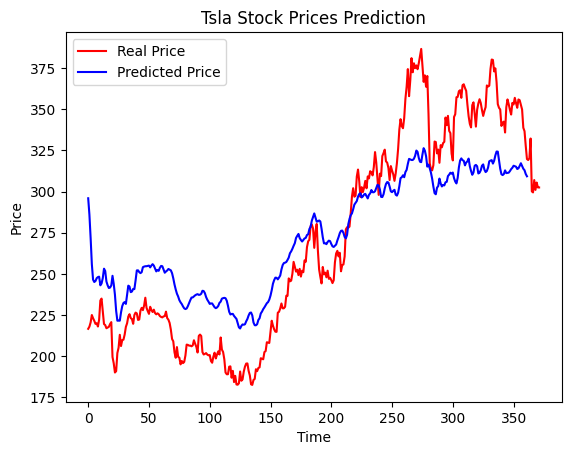

In [38]:
plt.plot(test_array, color = 'red', label = 'Real Price')
plt.plot(rnn_pred, color = 'blue', label = 'Predicted Price')
plt.title("Tsla Stock Prices Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

## **LSTM Model**

In [39]:
lstm_model = Sequential()

#add simple rnn layer with tanh activation function, with input shape
lstm_model.add(LSTM(50, activation = 'tanh', return_sequences = True, 
                       input_shape = (x_train.shape[1], 1)))
#add dropout layer
lstm_model.add(Dropout(0.2))

#add simple rnn layer with tanh activation function
lstm_model.add(LSTM(50,  return_sequences = True))
#add dropout layer
lstm_model.add(Dropout(0.2))

#add simple rnn layer with tanh activation function
lstm_model.add(LSTM(50, return_sequences = True))
#add dropout layer
lstm_model.add(Dropout(0.2))

#add simple rnn layer 
lstm_model.add(LSTM(50))
#add dropout layer
lstm_model.add(Dropout(0.2))

#add dense layer--> output
lstm_model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
lstm_model.compile(optimizer = 'adam', loss = 'MSE')
lstm_model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0666
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0046
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0037
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031
Epoc

In [41]:
lstm_pred = lstm_model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [42]:
lstm_pred

array([[0.9536186 ],
       [0.9435039 ],
       [0.9292605 ],
       [0.9097912 ],
       [0.8856086 ],
       [0.85806715],
       [0.8289373 ],
       [0.800048  ],
       [0.7730891 ],
       [0.7493557 ],
       [0.7299299 ],
       [0.71589816],
       [0.70787466],
       [0.7055667 ],
       [0.7077823 ],
       [0.7130289 ],
       [0.7197903 ],
       [0.72682345],
       [0.7332534 ],
       [0.73862153],
       [0.742791  ],
       [0.7449609 ],
       [0.7444044 ],
       [0.74061674],
       [0.7336346 ],
       [0.7243621 ],
       [0.71406686],
       [0.7042621 ],
       [0.69590336],
       [0.68967146],
       [0.68587613],
       [0.6846131 ],
       [0.6858994 ],
       [0.6895895 ],
       [0.6955124 ],
       [0.7032663 ],
       [0.71222067],
       [0.7216394 ],
       [0.7306674 ],
       [0.73883003],
       [0.74589145],
       [0.75179124],
       [0.75622725],
       [0.7591404 ],
       [0.7608063 ],
       [0.761642  ],
       [0.761966  ],
       [0.762

In [43]:
lstm_pred = scaler.inverse_transform(lstm_pred)

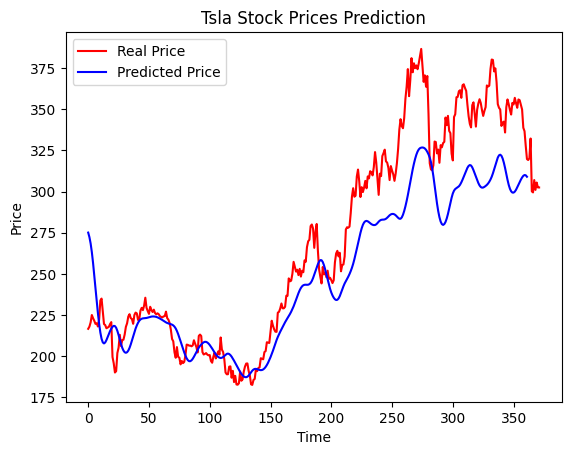

In [44]:
plt.plot(test_array, color = 'red', label = 'Real Price')
plt.plot(lstm_pred, color = 'blue', label = 'Predicted Price')
plt.title("Tsla Stock Prices Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()